<a href="https://colab.research.google.com/github/mikiiiiiiiiiiiiiiiiiiii/progetto_esame_AI/blob/main/progetto_classificazione_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
# load dei dati
# x il target: setosa = 0, versicolor = 2, virginica = 3
data= load_iris(return_X_y=True,as_frame=True)
target=pd.Series(data[1])
features=pd.DataFrame(data[0])
features.columns= features.columns.str.replace(' ','_')
full_data=features.join(target,how='right')
full_data

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**EXPLORATORY DATA ANALYSIS**

> Eslporiamo i nostri dati visualizzandoli



In [4]:
 
full_data.describe()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
full_data.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
full_data.isnull().sum()

sepal_length_(cm)    0
sepal_width_(cm)     0
petal_length_(cm)    0
petal_width_(cm)     0
target               0
dtype: int64

In [7]:
full_data.groupby('target').size()

target
0    50
1    50
2    50
dtype: int64

In [8]:
train, validation = train_test_split(full_data, test_size = 0.3, random_state = 42)
validation, test = train_test_split(validation, test_size = 0.5, random_state = 42)
print('train shape:',train.shape,'\n validation shape',validation.shape,'\n test shape',test.shape)

train shape: (105, 5) 
 validation shape (22, 5) 
 test shape (23, 5)


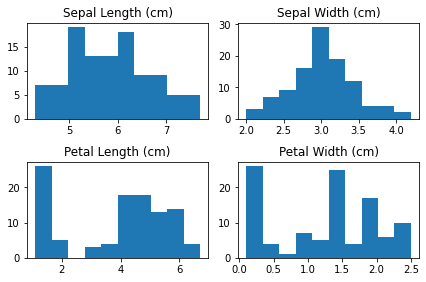

In [9]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length_(cm)'], bins = n_bins);
axs[0,0].set_title('Sepal Length (cm)');
axs[0,1].hist(train['sepal_width_(cm)'], bins = n_bins);
axs[0,1].set_title('Sepal Width (cm)');
axs[1,0].hist(train['petal_length_(cm)'], bins = n_bins);
axs[1,0].set_title('Petal Length (cm)');
axs[1,1].hist(train['petal_width_(cm)'], bins = n_bins);
axs[1,1].set_title('Petal Width (cm)');

#spazio tra i plot
fig.tight_layout(pad=1.0);


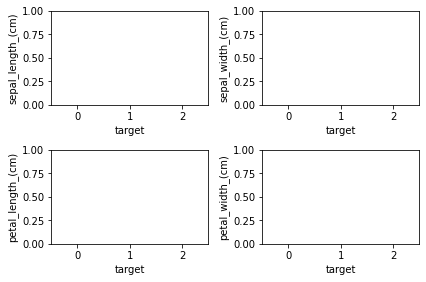

In [10]:
fig, axs = plt.subplots(2, 2)
fn = ["sepal_length(cm)", "sepal_width(cm)", "petal_length(cm)", "petal_width(cm)"]
cn = ['0', '1', '2']
sns.boxplot(x = 'target', y = 'sepal_length_(cm)', data = train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'target', y = 'sepal_width_(cm)', data = train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'target', y = 'petal_length_(cm)', data = train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'target', y = 'petal_width_(cm)', data = train,  order = cn, ax = axs[1,1]);
#spazio tra i plot
fig.tight_layout(pad=1.0);

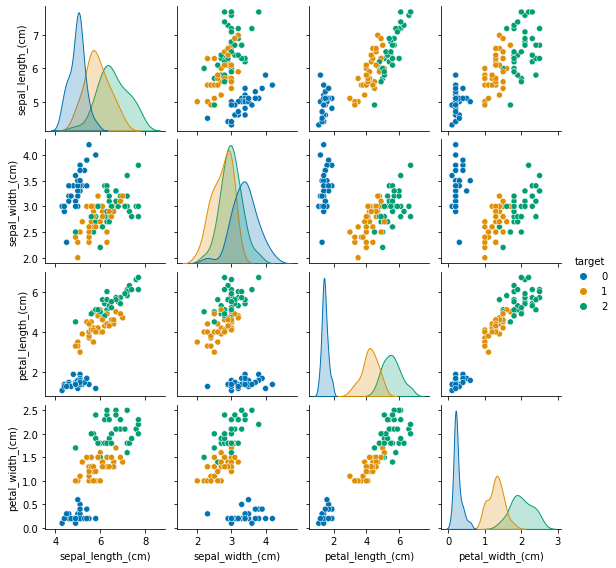

In [11]:
sns.pairplot(train, hue="target", height = 2, palette = 'colorblind')

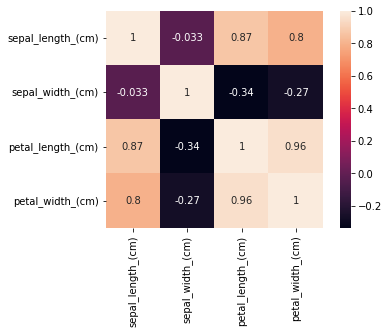

In [12]:
corrmat = train.iloc[:,0:4].corr()
sns.heatmap(corrmat, annot = True, square = True)

Cerchiamo il miglior classificatore 

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics

In [14]:
# scaler=StandardScaler()
# scaler.transform(validation)
# scaler.transform(test)
X_train = train.loc[:,['sepal_length_(cm)','sepal_width_(cm)','petal_length_(cm)','petal_width_(cm)']]
Y_train = train['target']
X_validation = validation.loc[:,['sepal_length_(cm)','sepal_width_(cm)','petal_length_(cm)','petal_width_(cm)']]
Y_validation = validation['target']
X_test = test.loc[:,['sepal_length_(cm)','sepal_width_(cm)','petal_length_(cm)','petal_width_(cm)']]
Y_test = test['target']
train.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),target
81,5.5,2.4,3.7,1.0,1
133,6.3,2.8,5.1,1.5,2
137,6.4,3.1,5.5,1.8,2
75,6.6,3.0,4.4,1.4,1
109,7.2,3.6,6.1,2.5,2


In [15]:
# naive bayes
nv_classifier= GaussianNB()
nv_classifier.fit(X_train, Y_train)
sc_val_nb=nv_classifier.score(X_validation,Y_validation)
sc_test_nb=nv_classifier.score(X_test,Y_test)
print('validation score:',sc_val_nb,'\ntest score:',sc_test_nb)

validation score: 1.0 
test score: 0.9565217391304348


In [16]:
#KNN
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
sc_val_knn=neigh.score(X_validation,Y_validation)
sc_test_knn=neigh.score(X_test,Y_test)
print('validation score:',sc_val_knn,'\ntest score:',sc_test_knn)

validation score: 1.0 
test score: 1.0


In [17]:
#SVM
svm_class = SVC()
svm_class.fit(X_train, Y_train)
sc_val_svm=svm_class.score(X_validation,Y_validation)
sc_test_svm=svm_class.score(X_test,Y_test)
print('validation score:',sc_val_svm,'\ntest score:',sc_test_svm)

validation score: 1.0 
test score: 1.0


In [18]:
#linear  SVM
svm_class_linear = LinearSVC()
svm_class_linear.fit(X_train, Y_train)
sc_val_svm_linear=svm_class_linear.score(X_validation,Y_validation)
sc_test_svm_linear=svm_class_linear.score(X_test,Y_test)
print('validation score:',sc_val_svm_linear,'\ntest score:',sc_test_svm_linear)

validation score: 1.0 
test score: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [19]:
#logistic regression
log_reg = LogisticRegression(verbose=1)
log_reg.fit(X_train, Y_train)
sc_val_log=log_reg.score(X_validation,Y_validation)
sc_test_log=log_reg.score(X_test,Y_test)
print('validation score:',sc_val_log,'\ntest score:',sc_test_log)

validation score: 1.0 
test score: 1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [20]:
coef=log_reg.coef_
bias=log_reg.intercept_
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 1,
 'warm_start': False}

In [25]:
#kmeans
kmeans=[]
sc_val_km=[]
sc_test_km=[]
I_s=[]
inertia=[]
for i in range(30):
  I_s.append(i)
  kmeans.append(KMeans(n_clusters=i).fit(X_train))
  sc_val_km=kmeans[i].inertia_#score(X_validation)
  # sc_test_km=kmeans[i].inertia_ #score(X_test)
#plot the score relative to the given clusters
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('SCORES')
ax1.plot(I_s, sc_val_km)
ax2.plot(I_s, sc_test_km)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:191: RuntimeWarning: divide by zero encountered in log
  n_local_trials = 2 + int(np.log(n_clusters))


OverflowError: ignored

In [26]:
#decision tree
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, Y_train)
sc_val_DecTree=DecTree.score(X_validation,Y_validation)
sc_test_DecTree=DecTree.score(X_test,Y_test)
print('validation score:',sc_val_DecTree,'\ntest score:',sc_test_DecTree)

validation score: 1.0 
test score: 1.0


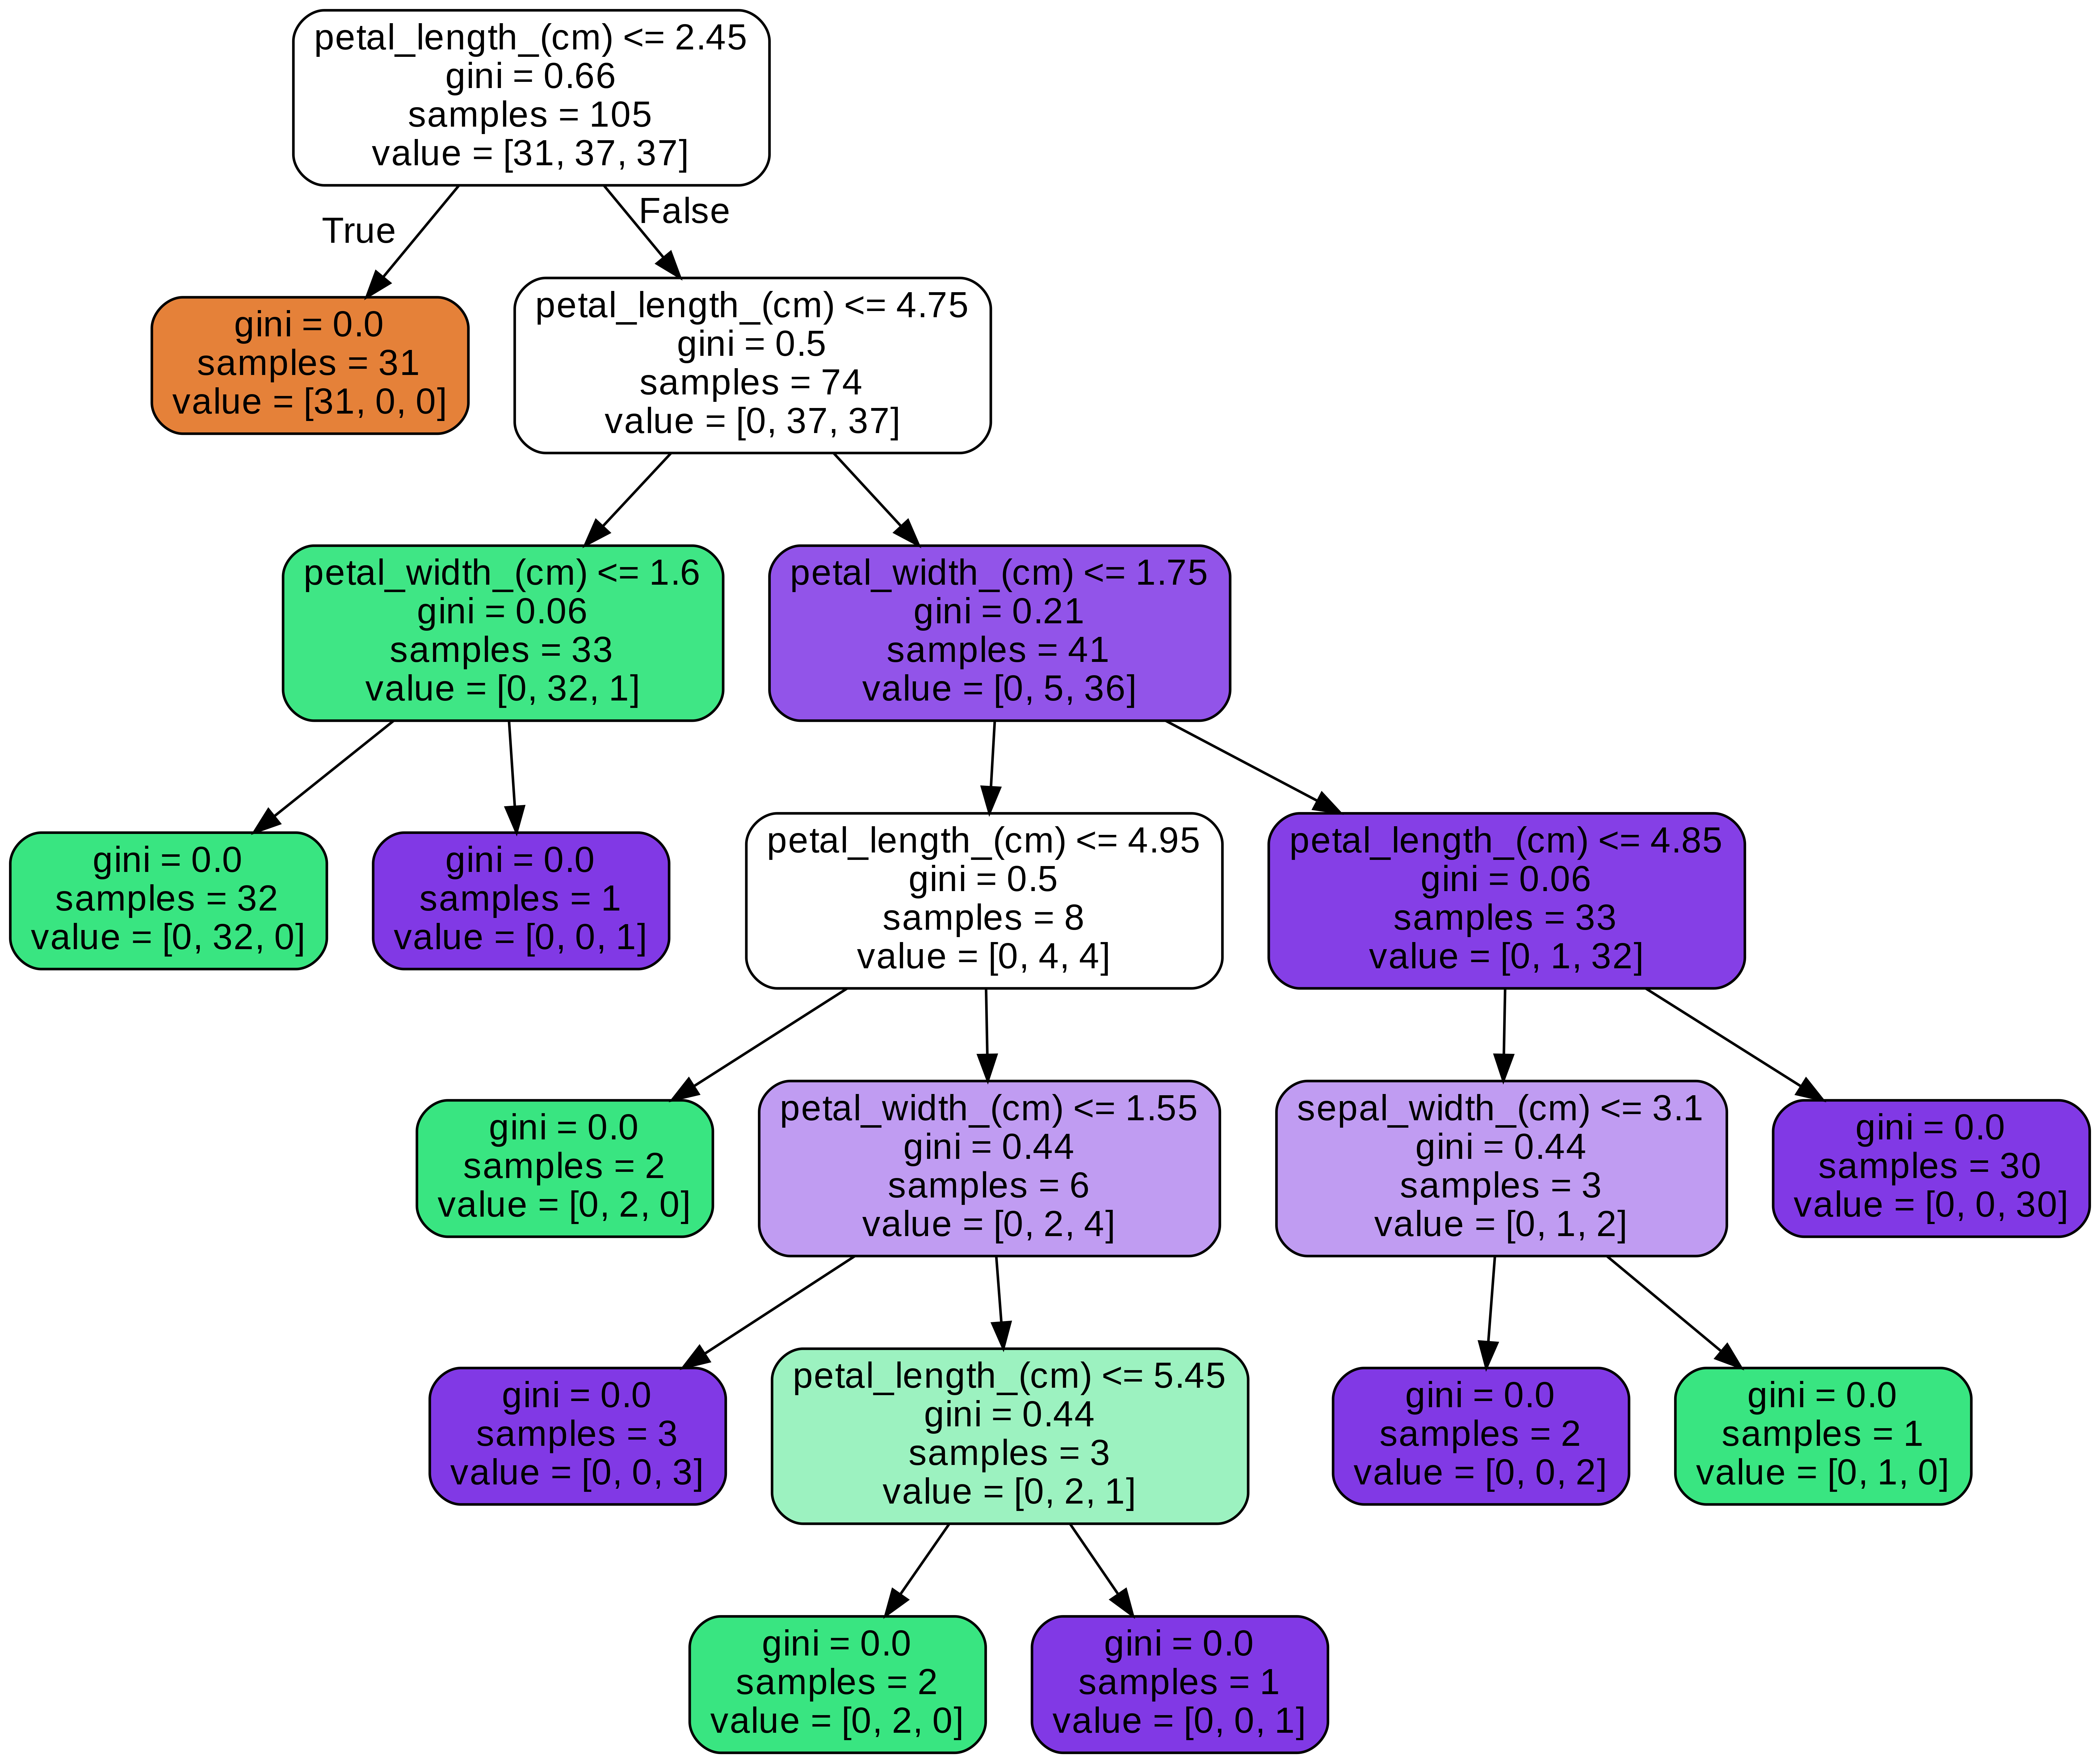

In [27]:
# visualize the decision tree
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(DecTree,
                out_file='DecTree.dot', 
                feature_names = X_train.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'DecTree.dot', '-o', 'DecTree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'DecTree.png')

In [28]:
#random forest
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train, Y_train)
sc_val_ranfor=random_forest.score(X_validation,Y_validation)
sc_test_ranfor=random_forest.score(X_test,Y_test)
print('validation score:',sc_val_ranfor,'\ntest score:',sc_test_ranfor)

validation score: 1.0 
test score: 1.0


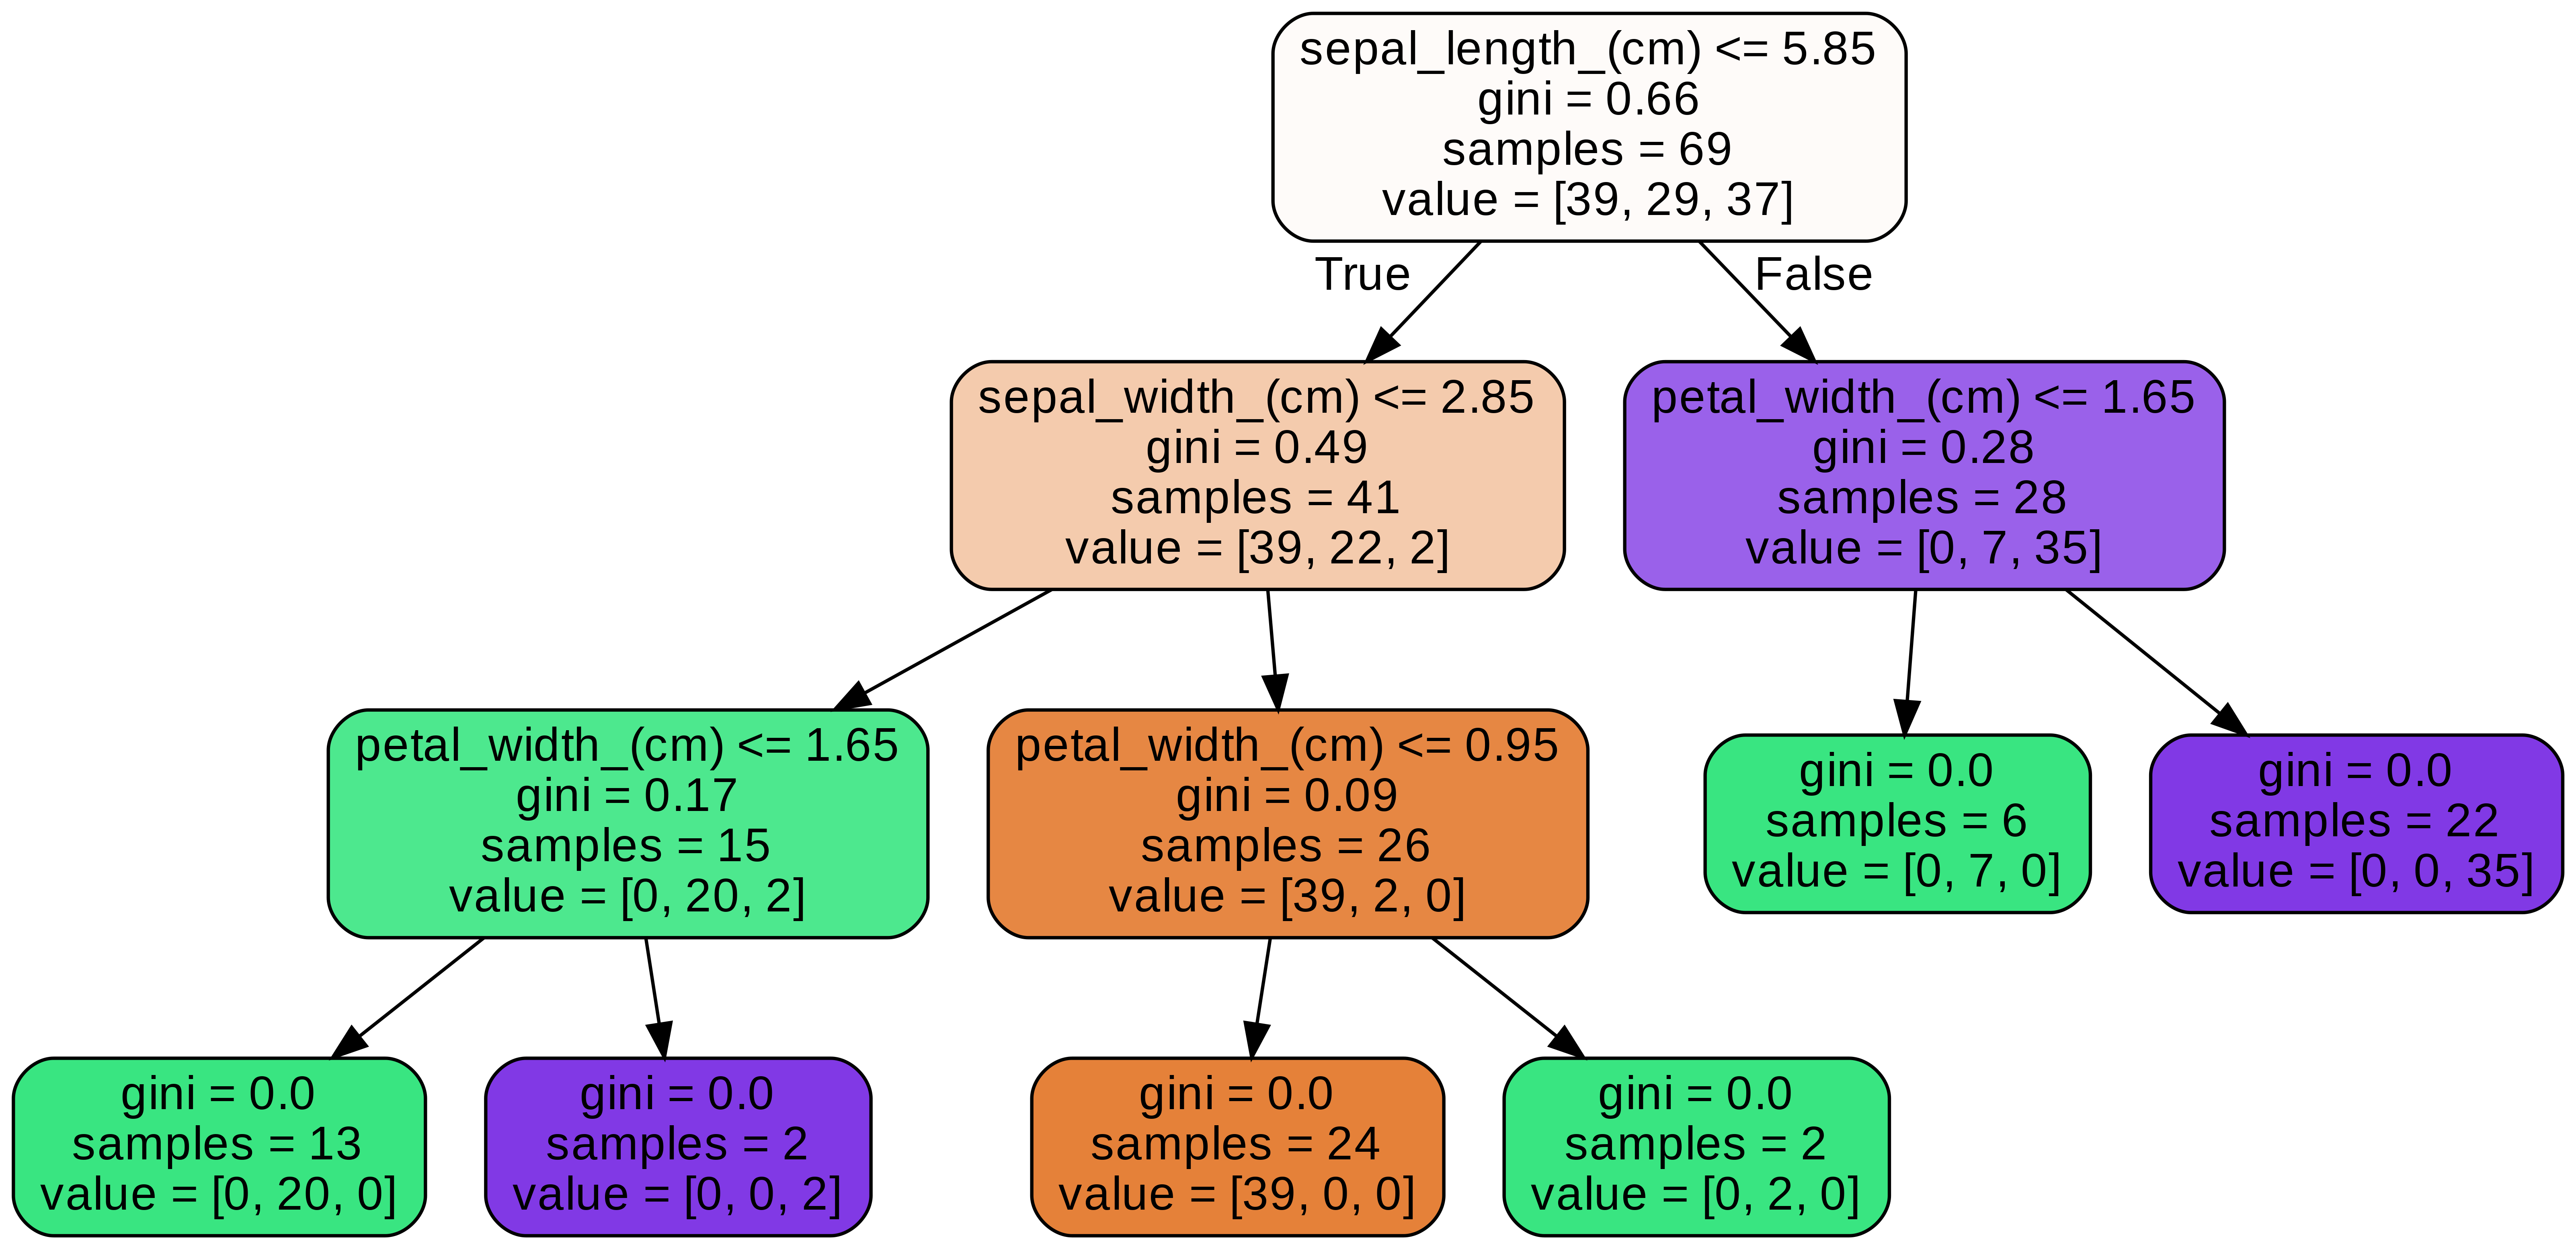

In [29]:
# visualize one tree of the forest
estimator = random_forest.estimators_[0]

# Export as dot file
export_graphviz(estimator, 
                out_file='first_tree.dot', 
                feature_names = X_train.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'first_tree.dot', '-o', 'first_tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'first_tree.png')

In [34]:
#Artificial Neural Network
model = keras.Sequential([
                    layers.Dense(units=16,input_dim=4, activation = 'relu'),
                    layers.Dense(units=32, activation = 'relu'),
                    layers.Dense(units=3, activation = 'softmax')
                    ])
model.compile(optimizer='adam', loss='MeanSquaredError', metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 100,restore_best_weights = True)
classifier_ANN_Model=model.fit(X_train,Y_train, batch_size=5 , epochs=1000, verbose=0 ,validation_data=(X_validation,Y_validation) ,callbacks=[early_stopping_cb])

In [35]:
test_loss, test_accuracy = model.evaluate(X_test,Y_test,verbose=0)

print('Test Loss(MSE):', test_loss,'\nTest accuracy:',test_accuracy)

Test Loss(MSE): 1.0676329135894775 
Test accuracy: 0.043478261679410934


In [36]:
model.metrics_names

['loss', 'accuracy']